**This is a kaggle data set about customer personality analysis.
It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.**


This project analyzes data by segment, and brings up some measures and correlations that can help the decision maker on which paths to follow.

It will be possible to: analyze wine consumption by gender in the last 2 years;
meat consumption by income in the last 2 years and at what stage of the marketing campaign are offers in general most accepted by the clients.

*(some labels were translated into Portuguese for better understanding)*

In [ ]:
# Importing Pandas library
import pandas as pd
import csv

In [ ]:
# Reading the file, now with the delimiter set
campanha = pd.read_csv('marketing_campaign.csv', sep='\t' )

In [ ]:
# Showing infos: columns, non-null values and variable type
campanha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
# Showind all columns names
campanha.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Discovering the delimiter, once it wasn't used the regular comma or semicolon
# Creating a function to return the delimiter 
def find_delimiter(filename):
    sniffer = csv.Sniffer()
    with open(filename) as fp:
        delimiter = sniffer.sniff(fp.read(2240)).delimiter
    return delimiter

In [ ]:
# Delimeter found
find_delimiter('marketing_campaign.csv')

'\t'

In [ ]:
# Showing campanha's shape
campanha.shape

(2240, 29)

In [ ]:
# Showing number of unique elements in the object.
campanha.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [ ]:
# Renaming columns
campanha.rename(columns= { 
    'Year_Birth': 'Nascimento',
    'Education': 'Educação',
    'Marital_Status': 'Estado_Civil',
    'Income': 'Renda',
    'Kidhome': 'Crianças_em_casa',
    'Teenhome' : 'Adolesc_em_casa',
    'Dt_Customer': 'Inscricao_cliente',
    'Recency': 'Dias_ultima_compra',
    'MntWines': 'Vinhos_2anos',
    'MntFruits': 'Frutas_2anos',
    'MntMeatProducts': 'Carnes_2anos',
    'MntFishProducts': 'Peixes_2anos',
    'MntSweetProducts': 'Doces_2anos',
    'MntGoldProds': 'Ouro_2anos',
    'NumDealsPurchases': 'compras_desconto',
    'NumWebPurchases': 'Compras_net', 
    'NumCatalogPurchases': 'Compras_cat',
    'NumStorePurchases': 'Compras_fis',
    'NumWebVisitsMonth': 'Visitas_web', 
    'AcceptedCmp3': 'Oferta_3ª_campanha', 
    'AcceptedCmp4': 'Oferta_4ª_campanha',
    'AcceptedCmp5': 'Oferta_5ª_campanha',
    'AcceptedCmp1': 'Oferta_1ª_campanha',
    'AcceptedCmp2': 'Oferta_2ª_campanha',
    'Complain': 'Reclamacao_2anos',
    'Z_CostContact': 'Custo_contato',
    'Z_Revenue': 'Receita',
    'Response': 'Resposta'
    }, inplace = True)

In [ ]:
campanha['Estado_Civil'].value_counts() 

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Estado_Civil, dtype: int64

In [ ]:
campanha.drop(campanha.index[campanha['Estado_Civil'] == 'YOLO'], inplace = True)
campanha.drop(campanha.index[campanha['Estado_Civil'] == 'Alone'], inplace = True)
campanha.drop(campanha.index[campanha['Estado_Civil'] == 'Absurd'], inplace = True)

campanha['Estado_Civil'].value_counts() 

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: Estado_Civil, dtype: int64

In [ ]:
campanha['Estado_Civil'].nunique()

5

In [ ]:
# Showing null values
campanha.isnull().sum()

ID                     0
Nascimento             0
Educação               0
Estado_Civil           0
Renda                 24
Crianças_em_casa       0
Adolesc_em_casa        0
Inscricao_cliente      0
Dias_ultima_compra     0
Vinhos_2anos           0
Frutas_2anos           0
Carnes_2anos           0
Peixes_2anos           0
Doces_2anos            0
Ouro_2anos             0
compras_desconto       0
Compras_net            0
Compras_cat            0
Compras_fis            0
Visitas_web            0
Oferta_3ª_campanha     0
Oferta_4ª_campanha     0
Oferta_5ª_campanha     0
Oferta_1ª_campanha     0
Oferta_2ª_campanha     0
Reclamacao_2anos       0
Custo_contato          0
Receita                0
Resposta               0
dtype: int64

In [ ]:
# Specifying null values
is_NaN = campanha.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = campanha[row_has_NaN]
rows_with_NaN

,ID,Nascimento,Educação,Estado_Civil,Renda,Crianças_em_casa,Adolesc_em_casa,Inscricao_cliente,Dias_ultima_compra,Vinhos_2anos,Frutas_2anos,Carnes_2anos,Peixes_2anos,Doces_2anos,Ouro_2anos,compras_desconto,Compras_net,Compras_cat,Compras_fis,Visitas_web,Oferta_3ª_campanha,Oferta_4ª_campanha,Oferta_5ª_campanha,Oferta_1ª_campanha,Oferta_2ª_campanha,Reclamacao_2anos,Custo_contato,Receita,Resposta
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,5,6,0,2,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,11,50,3,2,39,1,1,3,4,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,14-09-2012,25,25,3,43,17,4,17,3,3,0,3,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,19-11-2012,4,230,42,192,49,37,53,12,7,2,8,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,27-05-2014,45,7,0,8,2,0,1,1,1,0,2,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,23-11-2013,87,445,37,359,98,28,18,1,2,4,8,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,11-07-2013,23,352,0,27,10,0,15,3,6,1,7,6,0,0,0,0,0,0,3,11,0


In [ ]:
# Importing statistic library 
# Checking the average spending by segment rounding values
import statistics
media_vinho = statistics.mean(campanha['Vinhos_2anos'])
print('Média de gastos em vinho nos últimos 2 anos: R$', round(media_vinho,2))
media_frutas = statistics.mean(campanha['Frutas_2anos'])
print('Média de gastos em frutas nos últimos 2 anos: R$', round(media_frutas,2))
media_carnes = statistics.mean(campanha['Carnes_2anos'])
print('Média de gastos em carnes nos últimos 2 anos: R$', round(media_carnes,2))
media_peixes = statistics.mean(campanha['Peixes_2anos'])
print('Média de gastos em peixes nos últimos 2 anos: R$', round(media_peixes,2))
media_doces = statistics.mean(campanha['Doces_2anos'])
print('Média de gastos em doces nos últimos 2 anos: R$', round(media_doces,2))

Média de gastos em vinho nos últimos 2 anos: R$ 304.03
Média de gastos em frutas nos últimos 2 anos: R$ 26.3
Média de gastos em carnes nos últimos 2 anos: R$ 167.11
Média de gastos em peixes nos últimos 2 anos: R$ 37.45
Média de gastos em doces nos últimos 2 anos: R$ 27.11


In [ ]:
# Showing wine spending statistics over the last 2 years
import numpy as np
import pandas as pd
from sklearn import datasets
import matplotlib.pyplot as plt

def get_summary_statistics(dataset):
      
  mean = np.round(np.mean(dataset), 2)
  median = np.round(np.median(dataset), 2)
  min_value = np.round(dataset.min(), 2)
  max_value = np.round(dataset.max(), 2)
  quartile_1 = np.round(dataset.quantile(0.25), 2)
  quartile_3 = np.round(dataset.quantile(0.75), 2)
  iqr = np.round(quartile_3 - quartile_1, 2)
  print('Min: %s' % min_value)
  print('Max: %s' % max_value)
  print('Mean: %s' % mean)
  print('Median: %s' % median)
  print('25th percentile: %s' % quartile_1)
  print('75th percentile: %s' % quartile_3)
  print('Interquartile range (IQR): %s' % iqr)
get_summary_statistics(campanha['Vinhos_2anos'])


Min: 0
Max: 1493
Mean: 304.03
Median: 173.0
25th percentile: 24.0
75th percentile: 505.0
Interquartile range (IQR): 481.0


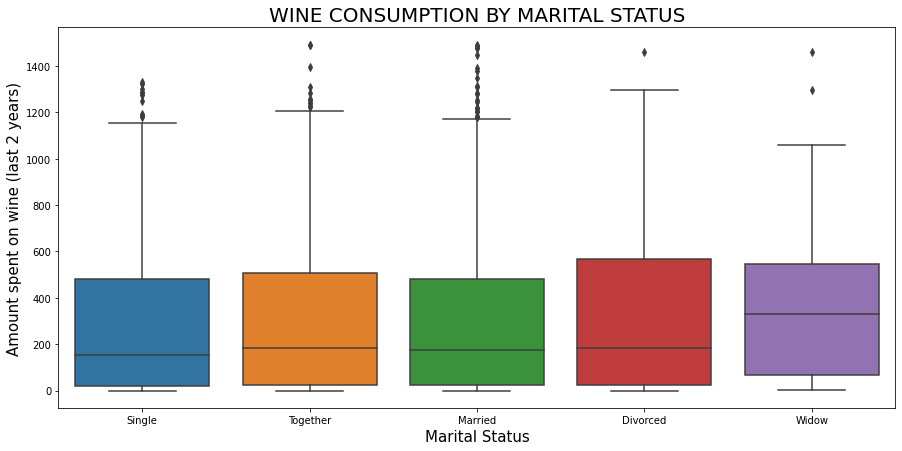

In [ ]:
# Importing Seaborn and Matplotlib libraries for graphics
# Defining figure size and axes
# Ploting a boxplot graphic to show the relation between marital status (x label) and the spending on wine in the last 2 years (y label)
# Discoverying the existence of outliers on each segment
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=[15,7])
sns.boxplot(x="Estado_Civil", y="Vinhos_2anos",data= campanha)
plt.xlabel("Marital Status", size=15)
plt.ylabel("Amount spent on wine (last 2 years)", size=15)
plt.title("WINE CONSUMPTION BY MARITAL STATUS", size = 20)
plt.show()
# Add major gridlines in the y-axis


# Understanding the BOXPLOT graphic:
# Quartiles divide a given dataset whose elements are real numbers into 4 groups, and each group includes 
# approximately 25% (or a quarter) of all values ​​included in the dataset.
# Let Q1 be the first quartile, Q2 the median and Q3 the third quartile. The four groups of data values ​​are defined by ranges
# Lower bound up to Q1, also known as the 25th percentile, means that 25% of the values ​​in the dataset are below it. 
# Q1 through Q2, which is called the 50th percentile, means that 50% of the values ​​in the dataset are below it (this is also the mean). 
# From Q2 to Q3, or third quartile, it means that 75% of the values ​​are below it. And from Q3 to Q4, that's what's missing for the upper limit.
# Values outside these measures, are known as OUTLIERS.

In [ ]:
# The boxplot graph above can be interpreted as follows:
# It's possible to observe that the largest consumption of wine belongs to the groups: Single, Together, Married and Divorced. 
# We can also observe that most outliers are in the groups Together and Married.
# Although the Widow group is not among the biggest consumers, it is possible to observe the presence of outliers.
# Groups Alone, Absurd and Yolo were removed.


In [ ]:
# Checking the number of people per marital status
campanha['Estado_Civil'].value_counts() 


Married     864
Together    580
Single      480
Divorced    232
Widow        77
Name: Estado_Civil, dtype: int64

**ANALYSIS: at what stage of the marketing campaign are offers in general most accepted by the clients?**

In [ ]:
# Checking the number of offers accepted on the first attempt
campanha['Oferta_1ª_campanha'].value_counts()

0    2090
1     143
Name: Oferta_1ª_campanha, dtype: int64

In [ ]:
# Checking the number of offers accepted on the second attempt
campanha['Oferta_2ª_campanha'].value_counts()

0    2203
1      30
Name: Oferta_2ª_campanha, dtype: int64

In [ ]:
# Checking the number of offers accepted on the third attempt
campanha['Oferta_3ª_campanha'].value_counts()

0    2071
1     162
Name: Oferta_3ª_campanha, dtype: int64

In [ ]:
# Checking the number of offers accepted on the fourth attempt
campanha['Oferta_4ª_campanha'].value_counts()

0    2066
1     167
Name: Oferta_4ª_campanha, dtype: int64

In [ ]:
# Checking the number of offers accepted on the fifith attempt
campanha['Oferta_5ª_campanha'].value_counts()

0    2071
1     162
Name: Oferta_5ª_campanha, dtype: int64

In [ ]:
campanha.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2233.0,5595.398567,3243.198115,0.0,2831.0,5462.0,8430.0,11191.0
Nascimento,2233.0,1968.790864,11.979248,1893.0,1959.0,1970.0,1977.0,1996.0
Renda,2209.0,52243.977818,25198.475858,1730.0,35246.0,51390.0,68627.0,666666.0
Crianças_em_casa,2233.0,0.444245,0.538528,0.0,0.0,0.0,1.0,2.0
Adolesc_em_casa,2233.0,0.506046,0.544675,0.0,0.0,0.0,1.0,2.0
Dias_ultima_compra,2233.0,49.172414,28.962114,0.0,24.0,50.0,74.0,99.0
Vinhos_2anos,2233.0,304.033587,336.953019,0.0,24.0,173.0,505.0,1493.0
Frutas_2anos,2233.0,26.300940,39.779532,0.0,1.0,8.0,33.0,199.0
Carnes_2anos,2233.0,167.113300,225.870588,0.0,16.0,67.0,232.0,1725.0
Peixes_2anos,2233.0,37.445141,54.461569,0.0,3.0,12.0,50.0,259.0


In [ ]:
med_1 = campanha['Oferta_1ª_campanha'].mean()

In [ ]:
med_2 = campanha['Oferta_2ª_campanha'].mean()

In [ ]:
med_3 =campanha['Oferta_3ª_campanha'].mean()

In [ ]:
med_4 =campanha['Oferta_4ª_campanha'].mean()

In [ ]:
med_5 =campanha['Oferta_5ª_campanha'].mean()

In [ ]:
med_cada = med_1, med_2, med_3, med_4, med_5

In [ ]:
med_cada

(0.06403940886699508,
 0.013434841021047918,
 0.07254814151365875,
 0.0747872816838334,
 0.07254814151365875)

In [ ]:
mediatotal = (0.06403940886699508 +
 0.013434841021047918 +
 0.07254814151365875 +
 0.0747872816838334 +
 0.07254814151365875)/5

In [ ]:
mediatotal

0.05947156291983878

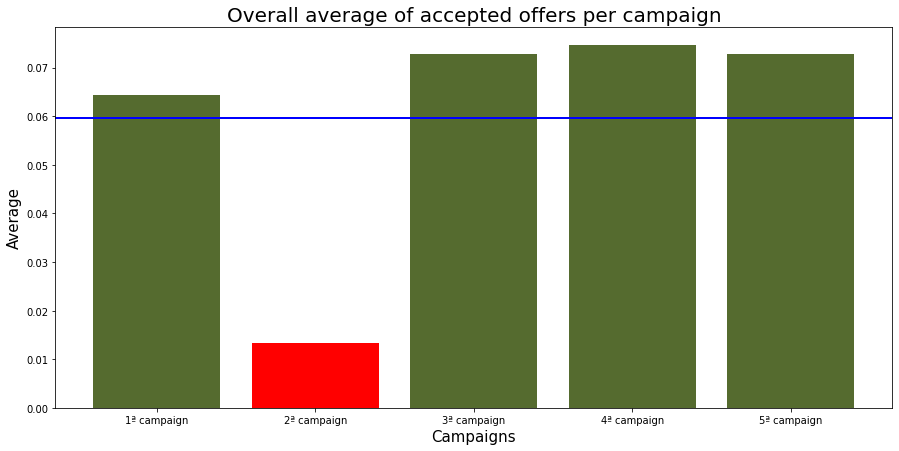

In [ ]:
#Importing Numpy and Matplotlib packages to create a barplot
import numpy as np
import matplotlib.pyplot as plt
from statistics import mean

data = {'1ª campaign': 0.064286,
        '2ª campaign': 0.013393,
        '3ª campaign': 0.072768,
        '4ª campaign': 0.074554,
        '5ª campaign': 0.072768}

group_data = list(data.values())
group_names = list(data.keys())
group_mean = np.mean(group_data)

# Defining conditions to show values under and above average
fig, ax = plt.subplots(figsize=(15, 7))
colors=['red' if i < 0.04
        else 'darkolivegreen' for i in med_cada]
plt.bar(group_names, group_data, width=0.8, color= colors)

ax.set_xlabel('Campaigns', fontsize = 15)
ax.set_ylabel('Average', fontsize = 15)
ax.set_title('Overall average of accepted offers per campaign', fontsize=20)
ax.axhline(group_mean.mean(), color = 'blue', linewidth = 2)
ax=ax



In [ ]:
# By this graphic, it's possible to realize that the second marketing campaign is the least accepted by consumers. 
# Values under the blue line, means that it is below the average.
# For the decision maker, it is worth analyzing why this happens, 
# while all other campaigns are above the average acceptance

**LINEAR REGRESSION**: correlation between consumption of sweets in the last 2 years per age

In [ ]:
campanha.head()

,ID,Nascimento,Educação,Estado_Civil,Renda,Crianças_em_casa,Adolesc_em_casa,Inscricao_cliente,Dias_ultima_compra,Vinhos_2anos,Frutas_2anos,Carnes_2anos,Peixes_2anos,Doces_2anos,Ouro_2anos,compras_desconto,Compras_net,Compras_cat,Compras_fis,Visitas_web,Oferta_3ª_campanha,Oferta_4ª_campanha,Oferta_5ª_campanha,Oferta_1ª_campanha,Oferta_2ª_campanha,Reclamacao_2anos,Custo_contato,Receita,Resposta
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


In [ ]:
Anos = campanha['Nascimento'].unique().tolist()


In [ ]:
# Sorting the list by ascending order
Anos.sort()

In [ ]:
Anos

[1893,
 1899,
 1900,
 1940,
 1941,
 1943,
 1944,
 1945,
 1946,
 1947,
 1948,
 1949,
 1950,
 1951,
 1952,
 1953,
 1954,
 1955,
 1956,
 1957,
 1958,
 1959,
 1960,
 1961,
 1962,
 1963,
 1964,
 1965,
 1966,
 1967,
 1968,
 1969,
 1970,
 1971,
 1972,
 1973,
 1974,
 1975,
 1976,
 1977,
 1978,
 1979,
 1980,
 1981,
 1982,
 1983,
 1984,
 1985,
 1986,
 1987,
 1988,
 1989,
 1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996]

In [ ]:
# Dropping the years equal or under 1940.
campanha_atual = campanha[~(campanha['Nascimento'] <= 1940)] 

In [ ]:
campanha_atual['Nascimento']

0       1957
1       1954
2       1965
3       1984
4       1981
        ... 
2235    1967
2236    1946
2237    1981
2238    1956
2239    1954
Name: Nascimento, Length: 2229, dtype: int64

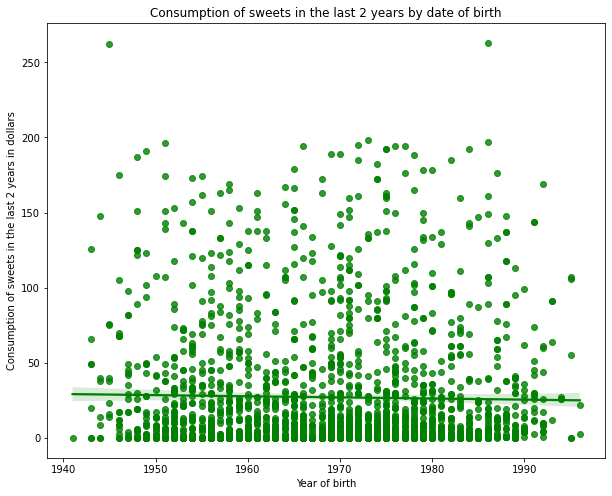

In [ ]:
# Ploting the graphic 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
f, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x="Nascimento", y="Doces_2anos", data=campanha_atual, dropna = True, color = 'green');
plt.xlabel('Year of birth')
plt.ylabel('Consumption of sweets in the last 2 years in dollars')
plt.title('Consumption of sweets in the last 2 years by date of birth')
ax=ax

In [ ]:
# It can be seen that the highest consumption of sweets per year of birth 
# is below the 50k range, with the highest consumption in the range from the 1950s to the 1985s